# *PERSONALITY PREDICTION*

*importing libraries to the colab file*

In [1]:
#importing the necessary libraries for traing our dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [2]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

In [3]:
# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

## *importing data*

*importing the dataset to the colab file from the drive folder*

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/personality_prediction/mbti_1.csv')

In [5]:
df  #reading the top five rows of the given dataset

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


##*about the dataset*

In [7]:
print(df.columns)
print("Dataframe has {} rows and {} columns".format(df.shape[0],df.shape[1]))
print("the column has: {} and {}".format(df.columns[0],df.columns[1]))

Index(['type', 'posts'], dtype='object')
Dataframe has 8675 rows and 2 columns
the column has: type and posts


In [8]:
print(df.info())
#to find number of null values
print("\nmunber of values that are null")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None

munber of values that are null
type     0
posts    0
dtype: int64


In [9]:
types= df['type'].unique()
types

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [10]:
total = df.groupby(['type']).count().sort_values(by=['posts'],ascending=False)
total

,posts
type,
INFP,1832
INFJ,1470
INTP,1304
INTJ,1091
ENTP,685
ENFP,675
ISTP,337
ISFP,271
ENTJ,231


## *visualization of the dataset*

Text(0.5, 1.0, 'Total posts for each personality type')

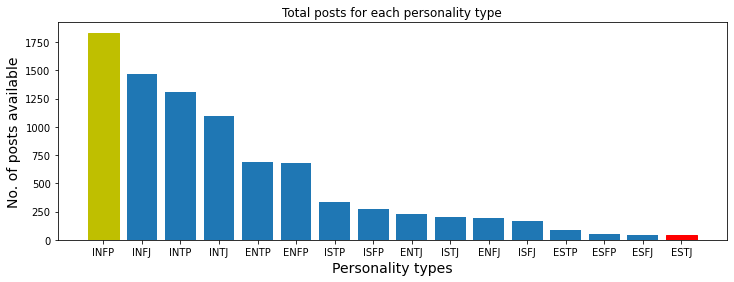

In [11]:
plt.figure(figsize = (12,4))
plot = plt.bar(np.array(total.index), height = total['posts'])
plot[0].set_color('y')
plot[-1].set_color('r')
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')

Text(0.5, 1.0, 'Length distribution of all 50 posts')

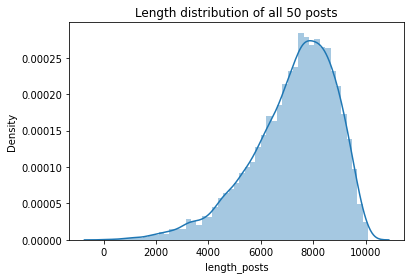

In [12]:
import seaborn as sns
df["length_posts"] = df["posts"].apply(len)
sns.distplot(df["length_posts"]).set_title("Length distribution of all 50 posts")

In [13]:
def get_types(row):
    t = row['type']

    # Dimensiones: IE, NS, TF, JP
    ## IE
    I = 1 if t[0] == 'I' else 0 
    ## NS
    N = 1 if t[1] == 'N' else 0 
    ## TF
    T = 1 if t[2] == 'T' else 0 
    ## JP
    J = 1 if t[3] == 'J' else 0 

    # Ejemplo: INFP (I = 1, N = 1, T = 0, J = 0)

    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

data_new = (df.apply (lambda row: get_types (row),axis=1))
data_new.head(5)

,IE,NS,TF,JP
0,1,1,0,1
1,0,1,1,0
2,1,1,1,0
3,1,1,1,1
4,0,1,1,1


In [14]:
print ("Introversion (I) -  Extroversion (E):\t", data_new['IE'].value_counts()[1], " / ", data_new['IE'].value_counts()[0])
print ("Intuition (N) – Sensing (S):\t\t", data_new['NS'].value_counts()[1], " / ", data_new['NS'].value_counts()[0])
print ("Thinking (T) – Feeling (F):\t\t", data_new['TF'].value_counts()[1], " / ", data_new['TF'].value_counts()[0])
print ("Judging (J) – Perceiving (P):\t\t", data_new['JP'].value_counts()[1], " / ", data_new['JP'].value_counts()[0])

Introversion (I) -  Extroversion (E):	 6676  /  1999
Intuition (N) – Sensing (S):		 7478  /  1197
Thinking (T) – Feeling (F):		 3981  /  4694
Judging (J) – Perceiving (P):		 3434  /  5241


In [15]:
counting = np.array(df['type'])
number_types=[]
list1 = counting.tolist()
for i in types:
  number_types.append(list1.count(i))
number_types

[1470,
 685,
 1304,
 1091,
 231,
 190,
 1832,
 675,
 271,
 337,
 166,
 205,
 89,
 48,
 39,
 42]

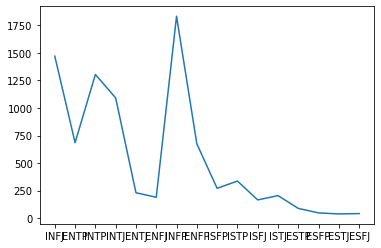

In [16]:
plt.plot(types,number_types);

## *data preprocessing*

In [17]:
def tokenize(text):
    '''
    Tokenize text and return a non-unique list of tokenized words found in the text. 
    Normalize to lowercase, strip punctuation, remove stop words, filter non-ascii characters.
    Lemmatize the words and lastly drop words of length < 3.
    '''
    text = text.lower()
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    words = nopunct.split(' ')
    # remove any non ascii
    words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(w) for w in words]
    words = [w for w in words if len(w) > 2]
    return words

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
                         tokenizer=tokenize, stop_words='english',
                         strip_accents='unicode', use_idf=1, min_df=10)
train_data = vector.fit_transform(df['posts'])

In [20]:
vector.get_feature_names()[0:20]

['aaaaaaaaa',
 'aaaaand',
 'aaaah',
 'aaaand',
 'aaah',
 'aaand',
 'aah',
 'aang',
 'aaron',
 'aba',
 'aback',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abba',
 'abbey',
 'abbreviation',
 'abby',
 'abc']

## *data encoding*

In [21]:
# Converting MBTI personality (or target or Y feature) into numerical form using Label Encoding
# encoding personality type
enc = LabelEncoder()
df['type of encoding'] = enc.fit_transform(df['type'])

target = df['type of encoding'] 

## *data splitting*

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.3, stratify=target, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(6072, 17009) (6072,) (2603, 17009) (2603,)


## *training and testing the best model*

In [61]:
accuracy={}

*logistic regression*

In [62]:
lr = LogisticRegression(C=4)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [63]:
a = accuracy_score(y_test, y_pred)
accuracy['logistic regression']=a
print("Accuracy: %.2f%%" % (a * 100.0))

Accuracy: 65.27%


*support vector machine kernel: linear*

In [64]:
from sklearn.svm import SVC
svm = SVC(random_state = 1,kernel='linear')
svm.fit(X_train, y_train)

Y_pred = svm.predict(X_test)

predictions = [round(value) for value in Y_pred]
# evaluate predictions
a = accuracy_score(y_test, predictions)
accuracy["svm: linear"]=a
print("Accuracy: %.2f%%" % (a * 100.0))

Accuracy: 65.23%


*support vector machine kernel: quadratic*

In [65]:
from sklearn.svm import SVC
svm = SVC(random_state = 1,kernel='poly')
svm.fit(X_train, y_train)

Y_pred = svm.predict(X_test)

predictions = [round(value) for value in Y_pred]
# evaluate predictions
a = accuracy_score(y_test, predictions)
accuracy['svm: poly']=a
print("Accuracy: %.2f%%" % (a * 100.0))

Accuracy: 48.33%


*support vector machine kernel: rbf*

In [66]:
from sklearn.svm import SVC
svm = SVC(random_state = 1,kernel='rbf')
svm.fit(X_train, y_train)

Y_pred = svm.predict(X_test)

predictions = [round(value) for value in Y_pred]
# evaluate predictions
a = accuracy_score(y_test, predictions)
accuracy['svm: rbf']=a
print("Accuracy: %.2f%%" % (a * 100.0))

Accuracy: 61.85%


*XG boost Classifier*

In [67]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

Y_pred = xgb.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
a = accuracy_score(y_test, predictions)
accuracy['XGB']=a
print("Accuracy: %.2f%%" % (a * 100.0))

Accuracy: 66.69%


*Random Forest*

In [68]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state = 1)
random_forest.fit(X_train, y_train)

# make predictions for test data
Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
a = accuracy_score(y_test, predictions)
accuracy['RandomForest']=a
print("Accuracy: %.2f%%" % (a * 100.0))

Accuracy: 48.67%


*GradientBoostingClassifier*

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)
a=clf.score(X_test, y_test)
accuracy['GBoosting']=a
print("Accuracy: %.2f%%" % (a * 100.0))

Accuracy: 58.39%


*comparing the accuracies of all the models and predicting who is yeilding the maximum*

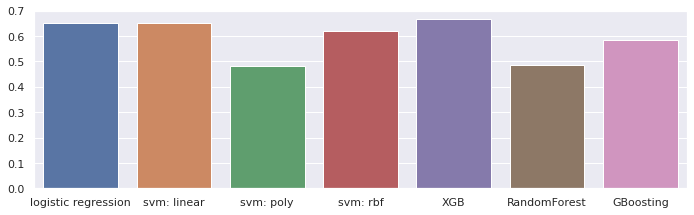

In [70]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,3.27)})
sns.barplot(list(accuracy.keys()), list(accuracy.values()))

## *hyperparameter tuning*

In [23]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = max(y)
    text=  "value ={:.3f}, score={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)


def plotting_graphs(x_label,y_label,v,a,t):
  fig, ax = plt.subplots()
  ax.plot(v,a)

  annot_max(v,a)
  # plt.ylim(0,t)
  plt.ylabel(y_label)
  plt.xlabel(x_label)
  plt.show()

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
n_range= np.linspace(1,11,20)
m_range= np.linspace(1,100,100)

*svm quadratic kernel*

In [ ]:
from sklearn import metrics
a=[]
accu=0
v=[]
maxi=0
for i in n_range:
  svclassifier = make_pipeline(StandardScaler(with_mean=False), SVC(kernel='linear',C=i))
  # svclassifier = SVC(kernel = 'poly', C=i)
  svclassifier.fit(X_train, y_train)
  accu=svclassifier.score(X_test, y_test)
  a.append(accu)
  v.append(i)
  if(accu>maxi):
    f_c=i
    maxi=accu

In [ ]:
plotting_graphs('value of c','score',v,a,0.6)